<h1> German Traffic Detection Benchmark Problem </h1>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

In [6]:
tf.__version__

'1.15.2'

The German Traffic Sign Detection Benchmark is an object
detection problem where the task at hand is to detect traffic signs.
Traffic sign detection is still a challenging real-world problem of high
industrial relevance.Participating algorithms need to pinpoint the
location of given categories of traffic signs (prohibitory, mandatory or
danger)

The Dataset Information is as follows :
A single-image detection problem

● 900 Images (divided in 600 training images and 300 evaluation
images)

● Division into four categories that suit the properties of various
detection approaches with different properties

<h2>Data-Set Acquisition </h2>

http://benchmark.ini.rub.de/?section=gtsdb&subsection=about

<h2> Dataset Format </h2>

<h3>Image Format  </h3>

- The images contain zero to six traffic signs. However, even if there is a traffic sign located in the image it may not belong to the competition relevant categories (prohibitive, danger, mandatory).
- Images are stored in PPM format
- The sizes of the traffic signs in the images vary from 16x16 to 128x128
- Traffic signs may appear in every perspective and under every lighting condition

<h3>Anootation Format </h3>

- Annotations are provided in CSV files. Fields are seperated by a semicolon (;). They contain the following information:

    - Filename: Filename of the image the annotations apply for
    - Traffic sign's region of interest (ROI) in the image
    - Leftmost image column of the ROI
    - Upmost image row of the ROI
    - Rightmost image column of the ROI
    - Downmost image row of the ROI
    - ID providing the traffic sign's class

<h2>Task of the Problem </h2>

<b>
    
- Our model should predict whether a given image belongs to any of the four classes namely "Prohibitory" , "Danger", "Mandatory" and "Other"
- There are 42 classes of traffic signs out of which they are grouped under 4 classes as mentioned above
    
</b>

In [7]:
import pandas as pd
annotation=pd.read_csv("/content/gdrive/My Drive/annotation.csv")
annotation['ImageID']=annotation['ImageID'].str.replace(".ppm",".jpg")

In [8]:
def parse_annotation(df,img_path):
    
    '''
    
    output:
    
    - Each element of the train_image is a dictionary containing the annotation infomation of an image.
    
    - seen_train_labels is the dictionary containing(key, value) = (the object class, the number of objects found in the images)
    
    
    '''
    all_imgs=[]
    
    seen_labels={}
    
    labels=['prohibitory','danger','mandatory','other']
    
    
    for root,_,files in os.walk(img_path):
        
        for file in files:
            
            img={'object':[]}
            
            if file.endswith(".jpg"):
      
                    
                img_root_path= img_path + file
                
                img['filename']=img_root_path
                
                temp_df=df[df["ImageID"] == file]
            
                
                for inde,row in temp_df.iterrows() :
                    
                    obj={}
            
                    
                    img['width']=1360
                
                    img['height']=800   
                    
                    
                    obj["name"]=labels[row['FinalClassID']]
                        
                    if obj['name'] in labels:
                    
                        obj['xmin'] = row['XMin']
                        obj['ymin'] = row['YMin']
                        obj['xmax'] = row['XMax']
                        obj['ymax'] = row['YMax']
                    
                    
                        
                    if  obj['name'] in seen_labels:
                    
                        seen_labels[obj['name']] += 1
                    
                    else:
                        seen_labels[obj['name']]  = 1
                    
                    
                
                    img['object']+=[obj]
            all_imgs+=[img]
            
                        
    return (all_imgs, seen_labels)

In [10]:
import os
train,seen=parse_annotation(annotation,"TrainIJCNN2013/")

In [11]:
seen

{'danger': 156, 'mandatory': 114, 'other': 186, 'prohibitory': 396}

# <h2>Yolo-v3 Algorithm </h2>

Code Reference
- https://github.com/experiencor/keras-yolo3

<h3>Parsing Annotated XML Files for our train_data </h3>

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os, cv2
%matplotlib inline

In [12]:
train_image_folder = "TrainIJCNN2013/"
train_annot_folder = ""

In [13]:
LABELS = ['prohibitory','danger','mandatory','other']

#### Visualize output : seen_train_labels

- seen_train_labels is the dictionary containing 
  -  (key, value) = (the object class, the number of objects found in the images)

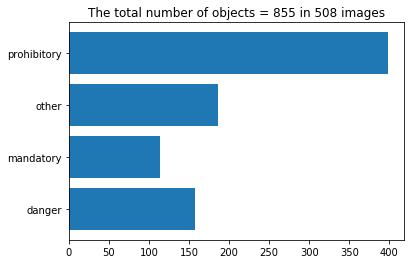

In [ ]:
y_pos = np.arange(len(seen_train_labels))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.barh(y_pos,list(seen_train_labels.values()))
ax.set_yticks(y_pos)
ax.set_yticklabels(list(seen_train_labels.keys()))
ax.set_title("The total number of objects = {} in {} images".format(
    np.sum(list(seen_train_labels.values())),len(train_image)
))
plt.show()

# Intersection over union


The bounding boxes are often defined by 4 parameters: (xmin,ymin, width, height).
When we calculate IoU between two bounding boxes, all we care is their width and height.
The coordinates of a bounding box, xmin and ymin, are not of concern as we want to only compare the shapes of the bounding boxes.

In otherwords, we can think that the xmin and ymin are shared by the two objects. See the picture below:

<img src="https://farm8.staticflickr.com/7813/46412972842_6d2af063e9_h.jpg" width="300" height="400" alt="bbx">
Then the IoU can be calculated in the usual way as: 
$$\begin{array}{rl}
IoU &= \frac{\textrm{intersection} }{
\textrm{union} - \textrm{intersection}
}\\
\textrm{intersection} &= Min(w_1,w_2)  Min(h_1,h_2)\\
\textrm{union} & = w_1 h_1 + w_2  h_2
\end{array}$$

<h2> Utility Functions </h2>

In [22]:
'''
Normalize a particular image

'''
def normalize(image):
    return image/255.

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


<h2>Bound-Box </h2>

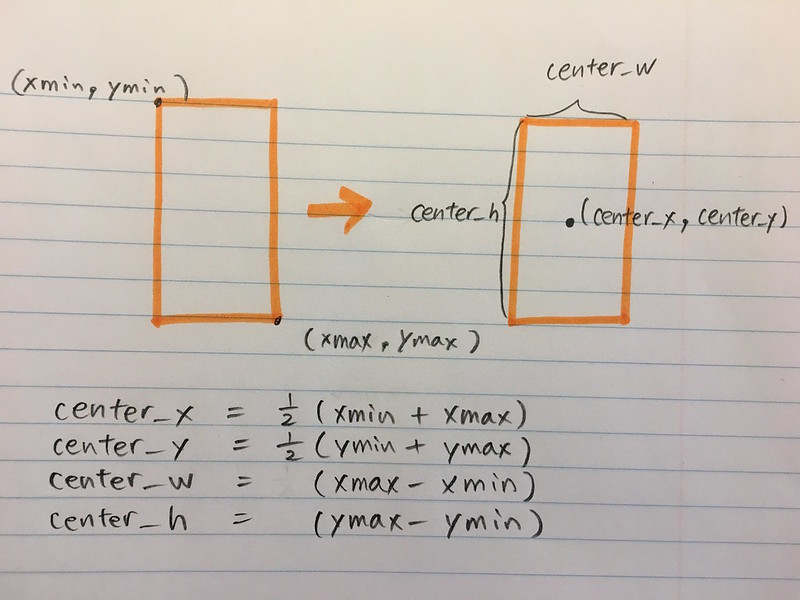

In [8]:
from IPython.display import Image
Image("C:\\Users\\aniru\\Desktop\\download.jpg",width=500,height=300)

In VOC2012 input encoding, each object in a frame is recorded in xmin, ymin, xmax and ymax coordiante formats. [{'name': 'person', 'xmin': 150, 'ymin': 84, 'xmax': 300, 'ymax': 294}]

In YOLO, outputs of YOLO encodes the bounding box coordinates in the 'center_x', 'center_y', 'center_w', 'center_h' format as: [{'name': 'person', 'center_x':225, 'center_y': 210, 'center_w': 150, 'center_h': 189}]

In [27]:
#https://github.com/experiencor/keras-yolo3
import numpy as np
import os
import cv2
def get_color(label):
    """ Return a color from a set of predefined colors. Contains 80 colors in total.
    code originally from https://github.com/fizyr/keras-retinanet/
    Args
        label: The label to get the color for.
    Returns
        A list of three values representing a RGB color.
    """
    if label < len(colors):
        return colors[label]
    else:
        print('Label {} has no color, returning default.'.format(label))
        return (0, 255, 0)

colors = [
    [31  , 0   , 255] ,
    [0   , 159 , 255] ,
    [255 , 95  , 0]   ,
    [255 , 19  , 0]   ,
    [255 , 0   , 0]   ,
    [255 , 38  , 0]   ,
    [0   , 255 , 25]  ,
    [255 , 0   , 133] ,
    [255 , 172 , 0]   ,
    [108 , 0   , 255] ,
    [0   , 82  , 255] ,
    [0   , 255 , 6]   ,
    [255 , 0   , 152] ,
    [223 , 0   , 255] ,
    [12  , 0   , 255] ,
    [0   , 255 , 178] ,
    [108 , 255 , 0]   ,
    [184 , 0   , 255] ,
    [255 , 0   , 76]  ,
    [146 , 255 , 0]   ,
    [51  , 0   , 255] ,
    [0   , 197 , 255] ,
    [255 , 248 , 0]   ,
    [255 , 0   , 19]  ,
    [255 , 0   , 38]  ,
    [89  , 255 , 0]   ,
    [127 , 255 , 0]   ,
    [255 , 153 , 0]   ,
    [0   , 255 , 255] ,
    [0   , 255 , 216] ,
    [0   , 255 , 121] ,
    [255 , 0   , 248] ,
    [70  , 0   , 255] ,
    [0   , 255 , 159] ,
    [0   , 216 , 255] ,
    [0   , 6   , 255] ,
    [0   , 63  , 255] ,
    [31  , 255 , 0]   ,
    [255 , 57  , 0]   ,
    [255 , 0   , 210] ,
    [0   , 255 , 102] ,
    [242 , 255 , 0]   ,
    [255 , 191 , 0]   ,
    [0   , 255 , 63]  ,
    [255 , 0   , 95]  ,
    [146 , 0   , 255] ,
    [184 , 255 , 0]   ,
    [255 , 114 , 0]   ,
    [0   , 255 , 235] ,
    [255 , 229 , 0]   ,
    [0   , 178 , 255] ,
    [255 , 0   , 114] ,
    [255 , 0   , 57]  ,
    [0   , 140 , 255] ,
    [0   , 121 , 255] ,
    [12  , 255 , 0]   ,
    [255 , 210 , 0]   ,
    [0   , 255 , 44]  ,
    [165 , 255 , 0]   ,
    [0   , 25  , 255] ,
    [0   , 255 , 140] ,
    [0   , 101 , 255] ,
    [0   , 255 , 82]  ,
    [223 , 255 , 0]   ,
    [242 , 0   , 255] ,
    [89  , 0   , 255] ,
    [165 , 0   , 255] ,
    [70  , 255 , 0]   ,
    [255 , 0   , 172] ,
    [255 , 76  , 0]   ,
    [203 , 255 , 0]   ,
    [204 , 0   , 255] ,
    [255 , 0   , 229] ,
    [255 , 133 , 0]   ,
    [127 , 0   , 255] ,
    [0   , 235 , 255] ,
    [0   , 255 , 197] ,
    [255 , 0   , 191] ,
    [0   , 44  , 255] ,
    [50  , 255 , 0]
]

class BoundBox:
    def __init__(self, xmin, ymin, xmax, ymax, c = None, classes = None):
        self.xmin = xmin
        self.ymin = ymin
        self.xmax = xmax
        self.ymax = ymax
        
        self.c       = c
        self.classes = classes

        self.label = -1
        self.score = -1

    def get_label(self):
        if self.label == -1:
            self.label = np.argmax(self.classes)
        
        return self.label
    
    def get_score(self):
        if self.score == -1:
            self.score = self.classes[self.get_label()]
            
        return self.score      

def _interval_overlap(interval_a, interval_b):
    x1, x2 = interval_a
    x3, x4 = interval_b

    if x3 < x1:
        if x4 < x1:
            return 0
        else:
            return min(x2,x4) - x1
    else:
        if x2 < x3:
             return 0
        else:
            return min(x2,x4) - x3    

def bbox_iou(box1, box2):
    intersect_w = _interval_overlap([box1.xmin, box1.xmax], [box2.xmin, box2.xmax])
    intersect_h = _interval_overlap([box1.ymin, box1.ymax], [box2.ymin, box2.ymax])  
    
    intersect = intersect_w * intersect_h

    w1, h1 = box1.xmax-box1.xmin, box1.ymax-box1.ymin
    w2, h2 = box2.xmax-box2.xmin, box2.ymax-box2.ymin
    
    union = w1*h1 + w2*h2 - intersect
    
    return float(intersect) / union

def draw_boxes(image, boxes, labels, obj_thresh, quiet=True):
    for box in boxes:
        label_str = ''
        label = -1
        
        for i in range(len(labels)):
            if box.classes[i] > obj_thresh:
                if label_str != '': label_str += ', '
                label_str += (labels[i] + ' ' + str(round(box.get_score()*100, 2)) + '%')
                label = i
            if not quiet: print(label_str)
                
        if label >= 0:
            text_size = cv2.getTextSize(label_str, cv2.FONT_HERSHEY_SIMPLEX, 1.1e-3 * image.shape[0], 5)
            width, height = text_size[0][0], text_size[0][1]
            region = np.array([[box.xmin-3,        box.ymin], 
                               [box.xmin-3,        box.ymin-height-26], 
                               [box.xmin+width+13, box.ymin-height-26], 
                               [box.xmin+width+13, box.ymin]], dtype='int32')  

            cv2.rectangle(img=image, pt1=(box.xmin,box.ymin), pt2=(box.xmax,box.ymax), color=get_color(label), thickness=5)
            cv2.fillPoly(img=image, pts=[region], color=get_color(label))
            cv2.putText(img=image, 
                        text=label_str, 
                        org=(box.xmin+13, box.ymin - 13), 
                        fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                        fontScale=1e-3 * image.shape[0], 
                        color=(0,0,0), 
                        thickness=2)
        
    return image          

<h2> Image Augmentation </h2>

In [28]:
#https://github.com/experiencor/keras-yolo3
import cv2
import numpy as np
import copy

def _rand_scale(scale):
    scale = np.random.uniform(1, scale)
    return scale if (np.random.randint(2) == 0) else 1./scale;

def _constrain(min_v, max_v, value):
    if value < min_v: return min_v
    if value > max_v: return max_v
    return value 

def random_flip(image, flip):
    if flip == 1: return cv2.flip(image, 1)
    return image

def correct_bounding_boxes(boxes, new_w, new_h, net_w, net_h, dx, dy, flip, image_w, image_h):
    boxes = copy.deepcopy(boxes)

    # randomize boxes' order
    np.random.shuffle(boxes)

    # correct sizes and positions
    sx, sy = float(new_w)/image_w, float(new_h)/image_h
    zero_boxes = []

    for i in range(len(boxes)):
        boxes[i]['xmin'] = int(_constrain(0, net_w, boxes[i]['xmin']*sx + dx))
        boxes[i]['xmax'] = int(_constrain(0, net_w, boxes[i]['xmax']*sx + dx))
        boxes[i]['ymin'] = int(_constrain(0, net_h, boxes[i]['ymin']*sy + dy))
        boxes[i]['ymax'] = int(_constrain(0, net_h, boxes[i]['ymax']*sy + dy))

        if boxes[i]['xmax'] <= boxes[i]['xmin'] or boxes[i]['ymax'] <= boxes[i]['ymin']:
            zero_boxes += [i]
            continue

        if flip == 1:
            swap = boxes[i]['xmin'];
            boxes[i]['xmin'] = net_w - boxes[i]['xmax']
            boxes[i]['xmax'] = net_w - swap

    boxes = [boxes[i] for i in range(len(boxes)) if i not in zero_boxes]

    return boxes

def random_distort_image(image, hue=18, saturation=1.5, exposure=1.5):
    # determine scale factors
    dhue = np.random.uniform(-hue, hue)
    dsat = _rand_scale(saturation);
    dexp = _rand_scale(exposure);     

    # convert RGB space to HSV space
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV).astype('float')
    
    # change satuation and exposure
    image[:,:,1] *= dsat
    image[:,:,2] *= dexp
    
    # change hue
    image[:,:,0] += dhue
    image[:,:,0] -= (image[:,:,0] > 180)*180
    image[:,:,0] += (image[:,:,0] < 0)  *180
    
    # convert back to RGB from HSV
    return cv2.cvtColor(image.astype('uint8'), cv2.COLOR_HSV2RGB)

def apply_random_scale_and_crop(image, new_w, new_h, net_w, net_h, dx, dy):
    im_sized = cv2.resize(image, (new_w, new_h))
    
    if dx > 0: 
        im_sized = np.pad(im_sized, ((0,0), (dx,0), (0,0)), mode='constant', constant_values=127)
    else:
        im_sized = im_sized[:,-dx:,:]
    if (new_w + dx) < net_w:
        im_sized = np.pad(im_sized, ((0,0), (0, net_w - (new_w+dx)), (0,0)), mode='constant', constant_values=127)
               
    if dy > 0: 
        im_sized = np.pad(im_sized, ((dy,0), (0,0), (0,0)), mode='constant', constant_values=127)
    else:
        im_sized = im_sized[-dy:,:,:]
        
    if (new_h + dy) < net_h:
        im_sized = np.pad(im_sized, ((0, net_h - (new_h+dy)), (0,0), (0,0)), mode='constant', constant_values=127)
        
    return im_sized[:net_h, :net_w,:]     

<h2> Batch Generator </h2>

While output encoding of the YOLO is complex, input encoding is pretty simple. The input encoding essentialily only requires to readin an image and resize it to the pre-specified shape.

Accordingly, the output's xmin, ymin, xmax and ymax also need to be resized. This is the first step of output encoding.

The ImageReader class below does the first step of input and output encoding

In Andrew Ng's youtube tutorial, the bounding box centers bx and by are defined to range between [0,1] while bh and bw are ranging between [0, N grid h) and [0, N grid w) i.e., in the grid cell scale. However, experiencor's code's script let bx and by also range between [0, N grid h) and [0, N grid w) in the grid cell scale. I will follow experiencor's code and rescale all the bounding box parameters to range in the grid cell scale.

The idea behind using a Keras generator is to get batches of input and corresponding output on the fly during training process, e.g. reading in 100 images, getting corresponding 100 label vectors and then feeding this set to the gpu for training step. I need to use generator as the entire input data (Nimages, height, width, N channel) = (508,IMAGE_H,IMAGE_W,3) is pretty large and does not fit in memory.

In [40]:
#https://github.com/experiencor/keras-yolo3
import cv2
import copy
import numpy as np
from keras.utils import Sequence

class BatchGenerator(Sequence):
    def __init__(self, 
        instances, 
        anchors,   
        labels,        
        downsample=32, # ratio between network input's size and network output's size, 32 for YOLOv3
        max_box_per_image=30,
        batch_size=1,
        #min_net_size=320,
        #max_net_size=608,    
        shuffle=True, 
        jitter=True, 
        norm=None
    ):
        self.instances          = instances
        self.batch_size         = batch_size
        self.labels             = labels
        self.downsample         = downsample
        self.max_box_per_image  = max_box_per_image
        #self.min_net_size       = (min_net_size//self.downsample)*self.downsample
        #self.max_net_size       = (max_net_size//self.downsample)*self.downsample
        self.shuffle            = shuffle
        self.jitter             = jitter
        self.norm               = norm
        self.anchors            = [BoundBox(0, 0, anchors[2*i], anchors[2*i+1]) for i in range(len(anchors)//2)]
        self.net_h              = 416  
        self.net_w              = 416

        if shuffle: np.random.shuffle(self.instances)
            
    def __len__(self):
        return int(np.ceil(float(len(self.instances))/self.batch_size))           

    def __getitem__(self, idx):
        # get image input size, change every 10 batches
        net_h, net_w = self.net_h,self.net_w
        base_grid_h, base_grid_w = net_h//self.downsample, net_w//self.downsample

        # determine the first and the last indices of the batch
        l_bound = idx*self.batch_size
        r_bound = (idx+1)*self.batch_size

        if r_bound > len(self.instances):
            r_bound = len(self.instances)
            l_bound = r_bound - self.batch_size

        x_batch = np.zeros((r_bound - l_bound, net_h, net_w, 3))             # input images
        t_batch = np.zeros((r_bound - l_bound, 1, 1, 1,  self.max_box_per_image, 4))   # list of groundtruth boxes

        # initialize the inputs and the outputs
        yolo_1 = np.zeros((r_bound - l_bound, 1*base_grid_h,  1*base_grid_w, len(self.anchors)//3, 4+1+len(self.labels))) # desired network output 1
        yolo_2 = np.zeros((r_bound - l_bound, 2*base_grid_h,  2*base_grid_w, len(self.anchors)//3, 4+1+len(self.labels))) # desired network output 2
        yolo_3 = np.zeros((r_bound - l_bound, 4*base_grid_h,  4*base_grid_w, len(self.anchors)//3, 4+1+len(self.labels))) # desired network output 3
        yolos = [yolo_3, yolo_2, yolo_1]

        dummy_yolo_1 = np.zeros((r_bound - l_bound, 1))
        dummy_yolo_2 = np.zeros((r_bound - l_bound, 1))
        dummy_yolo_3 = np.zeros((r_bound - l_bound, 1))
        
        instance_count = 0
        true_box_index = 0

        # do the logic to fill in the inputs and the output
        for train_instance in self.instances[l_bound:r_bound]:
            # augment input image and fix object's position and size
            img, all_objs = self._aug_image(train_instance, net_h, net_w)
            
            for obj in all_objs:
                # find the best anchor box for this object
                max_anchor = None                
                max_index  = -1
                max_iou    = -1

                shifted_box = BoundBox(0, 
                                       0,
                                       obj['xmax']-obj['xmin'],                                                
                                       obj['ymax']-obj['ymin'])    
                
                for i in range(len(self.anchors)):
                    anchor = self.anchors[i]
                    iou    = bbox_iou(shifted_box, anchor)

                    if max_iou < iou:
                        max_anchor = anchor
                        max_index  = i
                        max_iou    = iou                
                
                # determine the yolo to be responsible for this bounding box
                yolo = yolos[max_index//3]
                grid_h, grid_w = yolo.shape[1:3]
                
                # determine the position of the bounding box on the grid
                center_x = .5*(obj['xmin'] + obj['xmax'])
                center_x = center_x / float(net_w) * grid_w # sigma(t_x) + c_x
                center_y = .5*(obj['ymin'] + obj['ymax'])
                center_y = center_y / float(net_h) * grid_h # sigma(t_y) + c_y
                
                # determine the sizes of the bounding box
                w = np.log((obj['xmax'] - obj['xmin']) / float(max_anchor.xmax)) # t_w
                h = np.log((obj['ymax'] - obj['ymin']) / float(max_anchor.ymax)) # t_h

                box = [center_x, center_y, w, h]

                # determine the index of the label
                obj_indx = self.labels.index(obj['name'])  

                # determine the location of the cell responsible for this object
                grid_x = int(np.floor(center_x))
                grid_y = int(np.floor(center_y))

                # assign ground truth x, y, w, h, confidence and class probs to y_batch
                yolo[instance_count, grid_y, grid_x, max_index%3]      = 0
                yolo[instance_count, grid_y, grid_x, max_index%3, 0:4] = box
                yolo[instance_count, grid_y, grid_x, max_index%3, 4  ] = 1.
                yolo[instance_count, grid_y, grid_x, max_index%3, 5+obj_indx] = 1

                # assign the true box to t_batch
                true_box = [center_x, center_y, obj['xmax'] - obj['xmin'], obj['ymax'] - obj['ymin']]
                t_batch[instance_count, 0, 0, 0, true_box_index] = true_box

                true_box_index += 1
                true_box_index  = true_box_index % self.max_box_per_image    

            # assign input image to x_batch
            if self.norm != None: 
                x_batch[instance_count] = self.norm(img)
            else:
                # plot image and bounding boxes for sanity check
                for obj in all_objs:
                    cv2.rectangle(img, (obj['xmin'],obj['ymin']), (obj['xmax'],obj['ymax']), (255,0,0), 3)
                    cv2.putText(img, obj['name'], 
                                (obj['xmin']+2, obj['ymin']+12), 
                                0, 1.2e-3 * img.shape[0], 
                                (0,255,0), 2)
                
                x_batch[instance_count] = img

            # increase instance counter in the current batch
            instance_count += 1                 
                
        return [x_batch, t_batch, yolo_1, yolo_2, yolo_3], [dummy_yolo_1, dummy_yolo_2, dummy_yolo_3]
    '''
    def _get_net_size(self, idx):
        if idx%10 == 0:
            net_size = self.downsample*np.random.randint(self.min_net_size/self.downsample, \
                                                         self.max_net_size/self.downsample+1)
            print("resizing: ", net_size, net_size)
            self.net_h, self.net_w = net_size, net_size
        return self.net_h, self.net_w
    '''
    '''
    Image Augmentation to enhance the model to learn new variances
    '''
    def _aug_image(self, instance, net_h, net_w):
        image_name = instance['filename']
        image = cv2.imread(image_name) # RGB image
        
        if image is None: print('Cannot find ', image_name)
        image = image[:,:,::-1] # RGB image
            
        image_h, image_w, _ = image.shape
        
        # determine the amount of scaling and cropping
        dw = self.jitter * image_w;
        dh = self.jitter * image_h;

        new_ar = (image_w + np.random.uniform(-dw, dw)) / (image_h + np.random.uniform(-dh, dh));
        scale = np.random.uniform(0.25, 2);

        if (new_ar < 1):
            new_h = int(scale * net_h);
            new_w = int(net_h * new_ar);
        else:
            new_w = int(scale * net_w);
            new_h = int(net_w / new_ar);
            
        dx = int(np.random.uniform(0, net_w - new_w));
        dy = int(np.random.uniform(0, net_h - new_h));
        
        # apply scaling and cropping
        im_sized = apply_random_scale_and_crop(image, new_w, new_h, net_w, net_h, dx, dy)
        
        # randomly distort hsv space
        im_sized = random_distort_image(im_sized)
        
        # randomly flip
        flip = np.random.randint(2)
        im_sized = random_flip(im_sized, flip)
            
        # correct the size and pos of bounding boxes
        all_objs = correct_bounding_boxes(instance['object'], new_w, new_h, net_w, net_h, dx, dy, flip, image_w, image_h)
        
        return im_sized, all_objs   

    def on_epoch_end(self):
        if self.shuffle: np.random.shuffle(self.instances)
            
    def num_classes(self):
        return len(self.labels)

    def size(self):
        return len(self.instances)    

    def get_anchors(self):
        anchors = []

        for anchor in self.anchors:
            anchors += [anchor.xmax, anchor.ymax]

        return anchors

    def load_annotation(self, i):
        annots = []

        for obj in self.instances[i]['object']:
            annot = [obj['xmin'], obj['ymin'], obj['xmax'], obj['ymax'], self.labels.index(obj['name'])]
            annots += [annot]

        if len(annots) == 0: annots = [[]]

        return np.array(annots)

    def load_image(self, i):
        return cv2.imread(self.instances[i]['filename'])     

<h2>Yolov3 Model Architecture </h2>

YOLO v3 now performs multilabel classification for objects detected in images.
Earlier in YOLO, authors used to softmax the class scores and take the class with maximum score to be the class of the object contained in the bounding box. This has been modified in YOLO v3.
Softmaxing classes rests on the assumption that classes are mutually exclusive, or in simple words, if an object belongs to one class, then it cannot belong to the other. This works fine in COCO dataset.
However, when we have classes like Person and Women in a dataset, then the above assumption fails. This is the reason why the authors of YOLO have refrained from softmaxing the classes. Instead, each class score is predicted using logistic regression and a threshold is used to predict multiple labels for an object. Classes with scores higher than this threshold are assigned to the box.

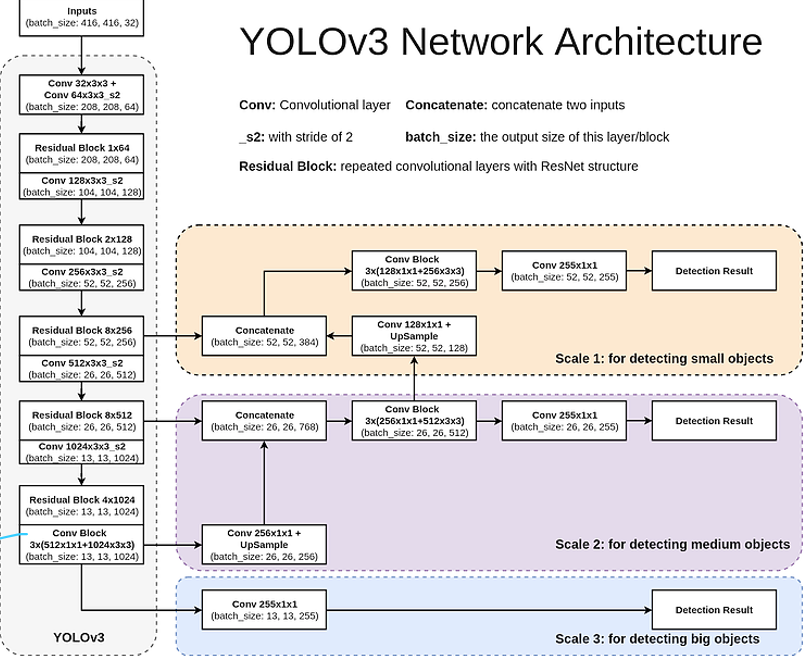

In [12]:
Image("C:\\Users\\aniru\\Desktop\\yolo3.png",width=600,height=600)

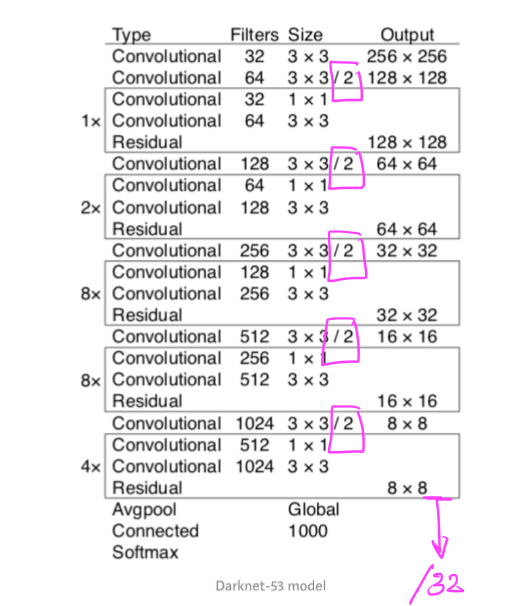

In [13]:
Image("C:\\Users\\aniru\\Desktop\\arch.png",height=300,width=300)

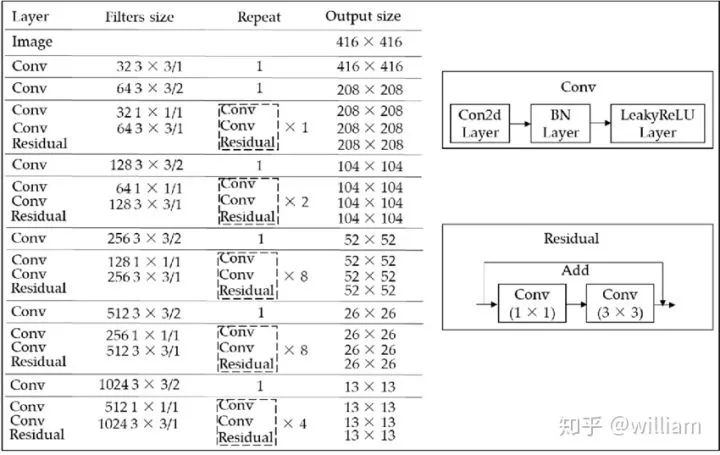

In [19]:
Image("C:\\Users\\aniru\\Desktop\\277e5c1261b47d8eee4bfe752a4ec23d3cc.jpg",height=500,width=500)

- Yolo v3 uses a Darknet 53 Model  Architecture which only uses convolutions.

<h2>Yolo-v3 Architecture Code </h2>

In [ ]:
def _conv_block(inp, convs, do_skip=True):
    x = inp
    count = 0
    
    for conv in convs:
        if count == (len(convs) - 2) and do_skip:
            skip_connection = x
        count += 1
        
        if conv['stride'] > 1: x = ZeroPadding2D(((1,0),(1,0)))(x) # unlike tensorflow darknet prefer left and top paddings
        x = Conv2D(conv['filter'], 
                   conv['kernel'], 
                   strides=conv['stride'], 
                   padding='valid' if conv['stride'] > 1 else 'same', # unlike tensorflow darknet prefer left and top paddings
                   name='conv_' + str(conv['layer_idx']), 
                   use_bias=False if conv['bnorm'] else True)(x)
        if conv['bnorm']: x = BatchNormalization(epsilon=0.001, name='bnorm_' + str(conv['layer_idx']))(x)
        if conv['leaky']: x = LeakyReLU(alpha=0.1, name='leaky_' + str(conv['layer_idx']))(x)

    return add([skip_connection, x]) if do_skip else x        

def create_yolov3_model(
    nb_class, 
    anchors, 
    max_box_per_image, 
    max_grid, 
    batch_size, 
    warmup_batches,
    ignore_thresh,
    grid_scales,
    obj_scale,
    noobj_scale,
    xywh_scale,
    class_scale
):
    input_image = Input(shape=(None, None, 3)) # net_h, net_w, 3
    true_boxes  = Input(shape=(1, 1, 1, max_box_per_image, 4))
    true_yolo_1 = Input(shape=(None, None, len(anchors)//6, 4+1+nb_class)) # grid_h, grid_w, nb_anchor, 5+nb_class
    true_yolo_2 = Input(shape=(None, None, len(anchors)//6, 4+1+nb_class)) # grid_h, grid_w, nb_anchor, 5+nb_class
    true_yolo_3 = Input(shape=(None, None, len(anchors)//6, 4+1+nb_class)) # grid_h, grid_w, nb_anchor, 5+nb_class

    # Layer  0 => 4
    x = _conv_block(input_image, [{'filter': 32, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 0},
                                  {'filter': 64, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 1},
                                  {'filter': 32, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 2},
                                  {'filter': 64, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 3}])

    # Layer  5 => 8
    x = _conv_block(x, [{'filter': 128, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 5},
                        {'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 6},
                        {'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 7}])

    # Layer  9 => 11
    x = _conv_block(x, [{'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 9},
                        {'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 10}])

    # Layer 12 => 15
    x = _conv_block(x, [{'filter': 256, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 12},
                        {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 13},
                        {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 14}])

    # Layer 16 => 36
    for i in range(7):
        x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 16+i*3},
                            {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 17+i*3}])
        
    skip_36 = x
        
    # Layer 37 => 40
    x = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 37},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 38},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 39}])

    # Layer 41 => 61
    for i in range(7):
        x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 41+i*3},
                            {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 42+i*3}])
        
    skip_61 = x
        
    # Layer 62 => 65
    x = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 62},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 63},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 64}])

    # Layer 66 => 74
    for i in range(3):
        x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 66+i*3},
                            {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 67+i*3}])
        
    # Layer 75 => 79
    x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 75},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 76},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 77},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 78},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 79}], do_skip=False)

    # Layer 80 => 82
    pred_yolo_1 = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 80},
                             {'filter': (3*(5+nb_class)), 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 81}], do_skip=False)
    loss_yolo_1 = YoloLayer(anchors[12:], 
                            [1*num for num in max_grid], 
                            batch_size, 
                            warmup_batches, 
                            ignore_thresh, 
                            grid_scales[0],
                            obj_scale,
                            noobj_scale,
                            xywh_scale,
                            class_scale)([input_image, pred_yolo_1, true_yolo_1, true_boxes])

    # Layer 83 => 86
    x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 84}], do_skip=False)
    x = UpSampling2D(2)(x)
    x = concatenate([x, skip_61])

    # Layer 87 => 91
    x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 87},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 88},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 89},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 90},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 91}], do_skip=False)

    # Layer 92 => 94
    pred_yolo_2 = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 92},
                             {'filter': (3*(5+nb_class)), 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 93}], do_skip=False)
    loss_yolo_2 = YoloLayer(anchors[6:12], 
                            [2*num for num in max_grid], 
                            batch_size, 
                            warmup_batches, 
                            ignore_thresh, 
                            grid_scales[1],
                            obj_scale,
                            noobj_scale,
                            xywh_scale,
                            class_scale)([input_image, pred_yolo_2, true_yolo_2, true_boxes])

    # Layer 95 => 98
    x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True,   'layer_idx': 96}], do_skip=False)
    x = UpSampling2D(2)(x)
    x = concatenate([x, skip_36])

    # Layer 99 => 106
    pred_yolo_3 = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 99},
                             {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 100},
                             {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 101},
                             {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 102},
                             {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 103},
                             {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 104},
                             {'filter': (3*(5+nb_class)), 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 105}], do_skip=False)
    loss_yolo_3 = YoloLayer(anchors[:6], 
                            [4*num for num in max_grid], 
                            batch_size, 
                            warmup_batches, 
                            ignore_thresh, 
                            grid_scales[2],
                            obj_scale,
                            noobj_scale,
                            xywh_scale,
                            class_scale)([input_image, pred_yolo_3, true_yolo_3, true_boxes]) 

    train_model = Model([input_image, true_boxes, true_yolo_1, true_yolo_2, true_yolo_3], [loss_yolo_1, loss_yolo_2, loss_yolo_3])
    infer_model = Model(input_image, [pred_yolo_1, pred_yolo_2, pred_yolo_3])

    return [train_model, infer_model]

def dummy_loss(y_true, y_pred):
    return tf.sqrt(tf.reduce_sum(y_pred))

<h3>Yolov3 Loss </h3>

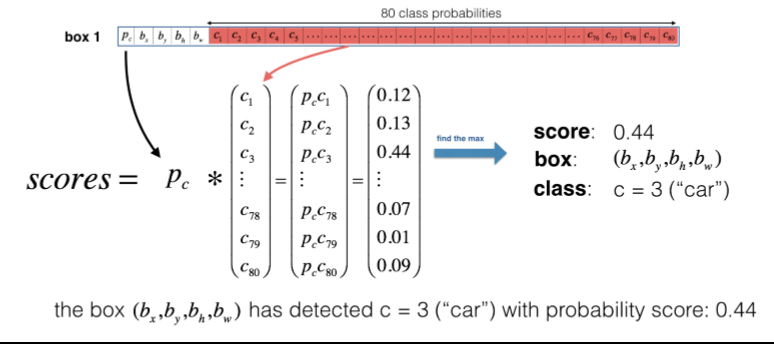

In [16]:
from IPython.display import Image
Image("C:\\Users\\aniru\\Desktop\\box.png",width=750,height=300)

- To Understand Yolo v3 loss let's get a hang of yolo v2 loss 

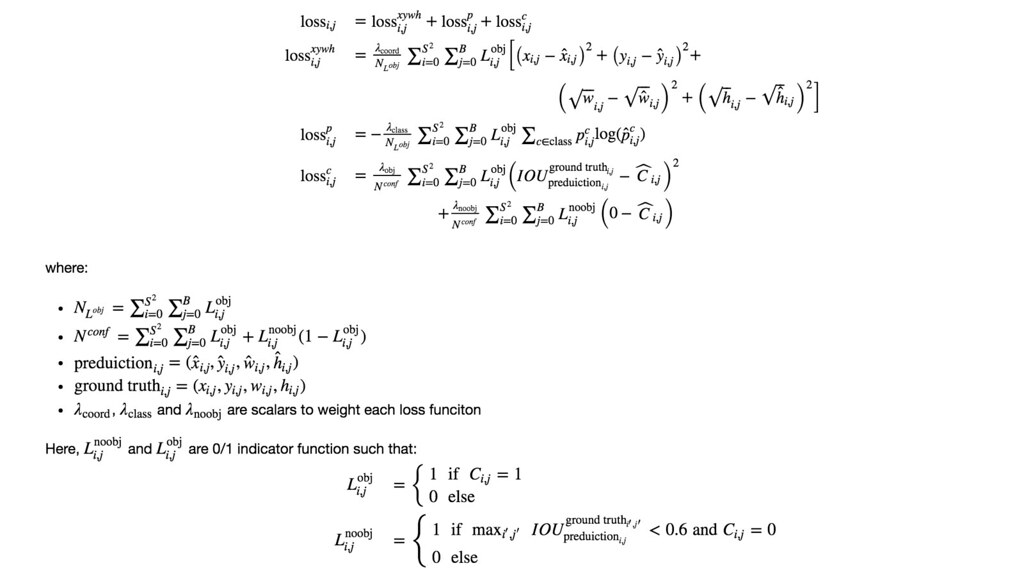

In [21]:
from IPython.display import Image
Image("C:\\Users\\aniru\\Desktop\\loss.jpg",width=750,height=500)

- I know this is intimidating, but notice the last three terms. Of them, the first one penalizes the objectness score prediction for bounding boxes responsible for predicting objects (the scores for these should ideally be 1), the second one for bounding boxes having no objects, (the scores should ideally be zero), and the last one penalises the class prediction for the bounding box which predicts the objects.
The last three terms in YOLO v2 are the squared errors, whereas in YOLO v3, they’ve been replaced by cross-entropy error terms. In other words, object confidence and class predictions in YOLO v3 are now predicted through logistic regression.

- Now Let us understand each term separately here


Here I revisit YOLO's ground truth output encoding with mathematical notations.


<code>
y_batch
</code>

The numpy array of shape  <code>(BATCH_SIZE, GRID_H, GRID_W, BOX, 4 + 1 + N classes) </code>.

BOX = The number of anchor boxes.

In the following notation, the grid cell index can be defined by two index (<code>igrid_h</code>,<code>igrid_w</code>) or by a single index $i$; (<code>igrid_h</code>,<code>igrid_w</code>) $\leftrightarrow i$

- <code>y_batch[iframe,igrid_h,igrid_w,j,:4]</code> contains <code>(center_x,center_y,center_w,center_h)</code> of <code>j</code>th anchor at <code>grid cell=(igrid_h,igrid_w)</code> = $i$, 
    if the object exists in this (grid cell, anchor) pair, else they simply contain 0.
    
    <code>y_batch[iframe,igrid_h,igrid_w,j,:4]</code>$= (x_{i,\texttt{j}},y_{i,\texttt{j}},w_{i,\texttt{j}},h_{i,\texttt{j}})$
    

- <code>y_batch[iframe,igrid_h,igrid_w,j,4]</code> 
    contains 1 if the object exists in this (grid cell, anchor) pair, else it contains 0.
    
     <code>y_batch[iframe,igrid_h,igrid_w,j,4]</code> = $ C_{i,\texttt{j}}$


- <code>y_batch[iframe,igrid_h,igrid_w,j,5 + iclass]</code> contains 1 if the <code>iclass</code>th class object exists in this (grid cell, anchor) pair, else it contains 0.

     <code>y_batch[iframe,igrid_h,igrid_w,j,5:]</code> $ = (p^1_{i,\texttt{j}},p^2_{i,\texttt{j}},p^3_{i,\texttt{j}},\cdots,p^{\textrm{Nclass}}_{i,\texttt{j}})$

The loss function of YOLO treats each set of elements 
<code>(center_x,center_y,center_w,center_h)</code>, 
<code>C</code>, and 
<code>(p_1,p_2,...p_Nclass)</code> in <code>y_batch[iframe,igrid_h,igrid_w,:]</code> differently. So let's understand each term of the loss one by one.


Then the loss corresponding to (grid cell, anchor box) pair = ($i,j$) is calculated as:

$$\small
%%%
\begin{array}{rl}\small
\textrm{loss}_{i,j} &= \textrm{loss}_{i,j}^{xywh} +  \textrm{loss}_{i,j}^p + \textrm{loss}_{i,j}^c \\
%%%
\textrm{loss}_{i,j}^{xywh}&=
\frac{\lambda_{\textrm{coord}}}{N_{L^{obj}}}
\sum_{i=0}^{S^2}
\sum_{j=0}^B
L_{i,j}^{\text{obj}}
\big[
\left(x_{i,j}-\hat{x}_{i,j}\right)^2 + 
\left(y_{i,j}-\hat{y}_{i,j}\right)^2 +\\
&\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\left(\sqrt{w}_{i,j}-\sqrt{\hat{w}}_{i,j}\right)^2 +
\left(\sqrt{h}_{i,j}-\sqrt{\hat{h}}_{i,j}\right)^2 
\big]\\
%%%
\textrm{loss}_{i,j}^p&=
-\frac{\lambda_{\text{class}}}{N_{L^{obj}}}
\sum_{i=0}^{S^2} \sum_{j=0}^B L_{i,j}^{\text{obj}}
\sum_{c \in \text{class}}  p_{i,j}^c \text{log}(\hat{p}_{i,j}^c)\\
%%%
\textrm{loss}_{i,j}^c &=
\frac{\lambda_{\text{obj}}}{N^{conf}}
\sum_{i=0}^{S^2}
\sum_{j=0}^B
L_{i,j}^{\text{obj}}
\left(
IOU_{\text{preduiction}_{i,j}}^{\text{ground truth}_{i,j}} - \widehat{C}_{i,j}
\right)^2\\
&\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;+
\frac{\lambda_{\textrm{noobj}}}{N^{conf}}
\sum_{i=0}^{S^2}
\sum_{j=0}^B
L_{i,j}^{\text{noobj}}
\left(0 - \widehat{C}_{i,j}\right)\\
\end{array}
$$

<h2> Adjust Predicition </h2>

### Step 1: Adjust prediction output 
 YOLO V2 loss function starts off by rescaling the prediction output. 
Notice that the predicted y_batch output can take any real values as the conv_23 layer has a linear activation function. However, the prediction outputs should be rescaled in the following range:


1. $\hat{x}_{i,j}$ ranges between [<code>igrid_w,igrid_w+1</code>).
2. $\hat{y}_{i,j}$ ranges between [<code>igrid_h,igrid_h+1</code>)
3. $\hat{w}_{i,j}$ ranges between 0, GRID_W
4. $\hat{h}_{i,j}$ ranges between 0, GRID_H
5. $\widehat{C}_{i,j}$ ranges between 0 and 1. 
6. $\widehat{p^c}_{i,j}$ ranges between 0 and 1

<b> The below code performs the above


- pred_box_xy    = (self.cell_grid[:,:grid_h,:grid_w,:,:] + tf.sigmoid(y_pred[..., :2]))  # sigma(t_xy) + c_xy
- pred_box_wh    = y_pred[..., 2:4]                                                       # t_wh
- pred_box_conf  = tf.expand_dims(tf.sigmoid(y_pred[..., 4]), 4)                          # adjust confidence
- pred_box_class = y_pred[..., 5:]

</b>

- Extraction of the ground truth output is simpler than the extraction of the prediction output because the ground truth is already encoded in the correct scales.

<h3>Adjust Ground Truth Values </h3>

#### Experiment <code>extract_ground_truth</code>
The scales of the $C_{i,j}$ and ${p^c}_{i,j}$ are different from $\widehat{C}_{i,j}$ and $\widehat{p^c}_{i,j}$, as the their ground truths take 0/1 values: 
<table>
  <tr>
    <th></th>
    <th>Estimate</th>
    <th>Ground truth</th> 
    
  </tr>
  <tr>
    <th>$C_{i,j}$</th>
    <td>between 0 and 1 </td> 
    <td>1 (=an object exists) or 0</td>
  </tr>
  <tr>
    <td>$p^c_{i,j}$</td>
    <td>between 0 and 1</td> 
    <td>1 (=$c$th class object exists) or 0
    </td>
  </tr>
  <tr>
    <td></td>
    <td></td> 
    <td>later transfered to class index  $c$</td>
  </tr>  
</table>



When $C_{i,j}=1$, the scales of $x_{i,j}$, $y_{i,j}$, $w_{i,j}$, $h_{i,j}$ are the same as $\hat{x}_{i,j}$, $\hat{y}_{i,j}$, $\hat{w}_{i,j}$, $\hat{h}_{i,j}$.
When $C_{i,j}=0$, then all bounding box parameters $x_{i,j}$, $y_{i,j}$, $w_{i,j}$, $h_{i,j}$ takes zero values as no object exists for the (grid_cell, anchor) pair.


<b>
    
- true_box_xy    = y_true[..., 0:2] # (sigma(t_xy) + c_xy)
- true_box_wh    = y_true[..., 2:4] # t_wh
- true_box_conf  = tf.expand_dims(y_true[..., 4], 4)
- true_box_class = tf.argmax(y_true[..., 5:], -1) 
<b>

### Step 3: calculate $\text{loss}_{i,j}^{xywh}$
Now we are ready to calculate the loss specific to the bounding box parameters. 

\begin{array}{rl}
\textrm{loss}_{i,j}^{xywh}&=
\frac{1}{N_{L^{obj}}}
\lambda_{\textrm{coord}}
\sum_{i=0}^{S^2}
\sum_{j=0}^B
L_{i,j}^{\text{obj}}
\big[
\left(x_{i,j}-\hat{x}_{i,j}\right)^2 + 
\left(y_{i,j}-\hat{y}_{i,j}\right)^2 +\\
&\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\left(\sqrt{w}_{i,j}-\sqrt{\hat{w}}_{i,j}\right)^2 +
\left(\sqrt{h}_{i,j}-\sqrt{\hat{h}}_{i,j}\right)^2 
\big]
\end{array}


- object_mask= tf.expand_dims(y_true[..., 4], 4)
- xywh_mask=lambda: [true_box_xy,true_box_wh,object_mask]
- xy_delta= xywh_mask   * (pred_box_xy-true_box_xy) * wh_scale * self.xywh_scale
- wh_delta= xywh_mask   * (pred_box_wh-true_box_wh) * wh_scale * self.xywh_scale
- loss_xy = tf.reduce_sum(tf.square(xy_delta),       list(range(1,5)))
- loss_wh = tf.reduce_sum(tf.square(wh_delta),       list(range(1,5)))

## $\textrm{loss}_{i,j}^c$
The rest of calculation is dedicated to evaluate confidence loss $\textrm{loss}_{i,j}^c$

$$
\textrm{loss}_{i,j}^c =\lambda_{\text{obj}}
\sum_{i=0}^{S^2}
\sum_{j=0}^B
L_{i,j}^{\text{obj}}
\left(
IOU_{\text{preduiction}_{i,j}}^{\text{ground truth}_{i,j}} - \widehat{C}_{i,j}
\right)^2+
\lambda_{\textrm{noobj}}
\sum_{i=0}^{S^2}
\sum_{j=0}^B
L_{i,j}^{\text{noobj}}
\left(0 - \widehat{C}_{i,j}\right)
$$

### Step 5, calculate $IOU_{\text{preduiction}_{i,j}}^{\text{ground truth}_{i,j}} $
For each (grid cell, anchor) pair, compute IOU between ground truth bounding box and predicted bounding box.
$IOU_{\text{preduiction}_{i,j}}^{\text{ground truth}_{i,j}} $ is 0 if $C_{i,j}=0$. 

 '''
    == INPUT ==
    true_xy,pred_xy, true_wh and pred_wh must have the same shape length

    p1 : pred_mins = (px1,py1)
    p2 : pred_maxs = (px2,py2)
    t1 : true_mins = (tx1,ty1) 
    t2 : true_maxs = (tx2,ty2) 
                 p1______________________ 
                 |      t1___________   |
                 |       |           |  |
                 |_______|___________|__|p2 
                         |           |rmax
                         |___________|
                                      t2
    intersect_mins : rmin = t1  = (tx1,ty1)
    intersect_maxs : rmax = (rmaxx,rmaxy)
    intersect_wh   : (rmaxx - tx1, rmaxy - ty1)
        
    '''
    true_wh_half = true_wh / 2.
    true_mins    = true_xy - true_wh_half
    true_maxes   = true_xy + true_wh_half
    
    pred_wh_half = pred_wh / 2.
    pred_mins    = pred_xy - pred_wh_half
    pred_maxes   = pred_xy + pred_wh_half    
    
    intersect_mins  = tf.maximum(pred_mins,  true_mins)
    intersect_maxes = tf.minimum(pred_maxes, true_maxes)
    intersect_wh    = tf.maximum(intersect_maxes - intersect_mins, 0.)
    intersect_areas = intersect_wh[..., 0] * intersect_wh[..., 1]
    
    true_areas = true_wh[..., 0] * true_wh[..., 1]
    pred_areas = pred_wh[..., 0] * pred_wh[..., 1]

    union_areas = pred_areas + true_areas - intersect_areas
    iou_scores  = tf.truediv(intersect_areas, union_areas)    

<b>

The last three terms in YOLO v2 are the squared errors, whereas in YOLO v3, they’ve been replaced by cross-entropy error terms. In other words, object confidence and class predictions in YOLO v3 are now predicted through logistic regression.
</b>

In [41]:
from keras.layers import Conv2D, Input, BatchNormalization, LeakyReLU, ZeroPadding2D, UpSampling2D, Lambda
from keras.layers.merge import add, concatenate
from keras.models import Model
from keras.engine.topology import Layer
import tensorflow as tf

debug = False

class YoloLayer(Layer):
    def __init__(self, anchors, max_grid, batch_size, warmup_batches, ignore_thresh, 
                    grid_scale, obj_scale, noobj_scale, xywh_scale, class_scale, 
                    **kwargs):
        # make the model settings persistent
        self.ignore_thresh  = ignore_thresh
        self.warmup_batches = warmup_batches
        self.anchors        = tf.constant(anchors, dtype='float', shape=[1,1,1,3,2])
        self.grid_scale     = grid_scale
        self.obj_scale      = obj_scale
        self.noobj_scale    = noobj_scale
        self.xywh_scale     = xywh_scale
        self.class_scale    = class_scale        

        # make a persistent mesh grid
        max_grid_h, max_grid_w = max_grid

        cell_x = tf.to_float(tf.reshape(tf.tile(tf.range(max_grid_w), [max_grid_h]), (1, max_grid_h, max_grid_w, 1, 1)))
        cell_y = tf.transpose(cell_x, (0,2,1,3,4))
        self.cell_grid = tf.tile(tf.concat([cell_x,cell_y],-1), [batch_size, 1, 1, 3, 1])

        super(YoloLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        super(YoloLayer, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x):
        input_image, y_pred, y_true, true_boxes = x

        # adjust the shape of the y_predict [batch, grid_h, grid_w, 3, 4+1+nb_class]
        y_pred = tf.reshape(y_pred, tf.concat([tf.shape(y_pred)[:3], tf.constant([3, -1])], axis=0))
        
        # initialize the masks
        object_mask     = tf.expand_dims(y_true[..., 4], 4)

        # the variable to keep track of number of batches processed
        batch_seen = tf.Variable(0.)        

        # compute grid factor and net factor
        grid_h      = tf.shape(y_true)[1]
        grid_w      = tf.shape(y_true)[2]
        grid_factor = tf.reshape(tf.cast([grid_w, grid_h], tf.float32), [1,1,1,1,2])

        net_h       = tf.shape(input_image)[1]
        net_w       = tf.shape(input_image)[2]            
        net_factor  = tf.reshape(tf.cast([net_w, net_h], tf.float32), [1,1,1,1,2])
        
        """
        Adjust prediction
        """
        pred_box_xy    = (self.cell_grid[:,:grid_h,:grid_w,:,:] + tf.sigmoid(y_pred[..., :2]))  # sigma(t_xy) + c_xy
        pred_box_wh    = y_pred[..., 2:4]                                                       # t_wh
        pred_box_conf  = tf.expand_dims(tf.sigmoid(y_pred[..., 4]), 4)                          # adjust confidence
        pred_box_class = y_pred[..., 5:]                                                        # adjust class probabilities      

        """
        Adjust ground truth
        """
        true_box_xy    = y_true[..., 0:2] # (sigma(t_xy) + c_xy)
        true_box_wh    = y_true[..., 2:4] # t_wh
        true_box_conf  = tf.expand_dims(y_true[..., 4], 4)
        true_box_class = tf.argmax(y_true[..., 5:], -1)         

        """
        Compare each predicted box to all true boxes
        """        
        # initially, drag all objectness of all boxes to 0
        conf_delta  = pred_box_conf - 0 

        # then, ignore the boxes which have good overlap with some true box
        true_xy = true_boxes[..., 0:2] / grid_factor
        true_wh = true_boxes[..., 2:4] / net_factor
        
        true_wh_half = true_wh / 2.
        true_mins    = true_xy - true_wh_half
        true_maxes   = true_xy + true_wh_half
        
        pred_xy = tf.expand_dims(pred_box_xy / grid_factor, 4)
        pred_wh = tf.expand_dims(tf.exp(pred_box_wh) * self.anchors / net_factor, 4)
        
        pred_wh_half = pred_wh / 2.
        pred_mins    = pred_xy - pred_wh_half
        pred_maxes   = pred_xy + pred_wh_half    

        intersect_mins  = tf.maximum(pred_mins,  true_mins)
        intersect_maxes = tf.minimum(pred_maxes, true_maxes)

        intersect_wh    = tf.maximum(intersect_maxes - intersect_mins, 0.)
        intersect_areas = intersect_wh[..., 0] * intersect_wh[..., 1]
        
        true_areas = true_wh[..., 0] * true_wh[..., 1]
        pred_areas = pred_wh[..., 0] * pred_wh[..., 1]

        union_areas = pred_areas + true_areas - intersect_areas
        iou_scores  = tf.truediv(intersect_areas, union_areas)

        best_ious   = tf.reduce_max(iou_scores, axis=4)        
        conf_delta *= tf.expand_dims(tf.to_float(best_ious < self.ignore_thresh), 4)

        """
        Compute some online statistics
        """            
        true_xy = true_box_xy / grid_factor
        true_wh = tf.exp(true_box_wh) * self.anchors / net_factor

        true_wh_half = true_wh / 2.
        true_mins    = true_xy - true_wh_half
        true_maxes   = true_xy + true_wh_half

        pred_xy = pred_box_xy / grid_factor
        pred_wh = tf.exp(pred_box_wh) * self.anchors / net_factor 
        
        pred_wh_half = pred_wh / 2.
        pred_mins    = pred_xy - pred_wh_half
        pred_maxes   = pred_xy + pred_wh_half      

        intersect_mins  = tf.maximum(pred_mins,  true_mins)
        intersect_maxes = tf.minimum(pred_maxes, true_maxes)
        intersect_wh    = tf.maximum(intersect_maxes - intersect_mins, 0.)
        intersect_areas = intersect_wh[..., 0] * intersect_wh[..., 1]
        
        true_areas = true_wh[..., 0] * true_wh[..., 1]
        pred_areas = pred_wh[..., 0] * pred_wh[..., 1]

        union_areas = pred_areas + true_areas - intersect_areas
        iou_scores  = tf.truediv(intersect_areas, union_areas)
        iou_scores  = object_mask * tf.expand_dims(iou_scores, 4)
        
        count       = tf.reduce_sum(object_mask)
        count_noobj = tf.reduce_sum(1 - object_mask)
        detect_mask = tf.to_float((pred_box_conf*object_mask) >= 0.5)
        class_mask  = tf.expand_dims(tf.to_float(tf.equal(tf.argmax(pred_box_class, -1), true_box_class)), 4)
        recall50    = tf.reduce_sum(tf.to_float(iou_scores >= 0.5 ) * detect_mask  * class_mask) / (count + 1e-3)
        recall75    = tf.reduce_sum(tf.to_float(iou_scores >= 0.75) * detect_mask  * class_mask) / (count + 1e-3)    
        avg_iou     = tf.reduce_sum(iou_scores) / (count + 1e-3)
        avg_obj     = tf.reduce_sum(pred_box_conf  * object_mask)  / (count + 1e-3)
        avg_noobj   = tf.reduce_sum(pred_box_conf  * (1-object_mask))  / (count_noobj + 1e-3)
        avg_cat     = tf.reduce_sum(object_mask * class_mask) / (count + 1e-3) 

        """
        Warm-up training
        """
        batch_seen = tf.assign_add(batch_seen, 1.)
        
        true_box_xy, true_box_wh, xywh_mask = tf.cond(tf.less(batch_seen, self.warmup_batches+1), 
                              lambda: [true_box_xy + (0.5 + self.cell_grid[:,:grid_h,:grid_w,:,:]) * (1-object_mask), 
                                       true_box_wh + tf.zeros_like(true_box_wh) * (1-object_mask), 
                                       tf.ones_like(object_mask)],
                              lambda: [true_box_xy, 
                                       true_box_wh,
                                       object_mask])

        """
        Compare each true box to all anchor boxes
        """      
        wh_scale = tf.exp(true_box_wh) * self.anchors / net_factor
        wh_scale = tf.expand_dims(2 - wh_scale[..., 0] * wh_scale[..., 1], axis=4) # the smaller the box, the bigger the scale

        xy_delta    = xywh_mask   * (pred_box_xy-true_box_xy) * wh_scale * self.xywh_scale
        wh_delta    = xywh_mask   * (pred_box_wh-true_box_wh) * wh_scale * self.xywh_scale
        conf_delta  = object_mask * (pred_box_conf-true_box_conf) * self.obj_scale + (1-object_mask) * conf_delta * self.noobj_scale
        class_delta = object_mask * \
                      tf.expand_dims(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=true_box_class, logits=pred_box_class), 4) * \
                      self.class_scale

        loss_xy    = tf.reduce_sum(tf.square(xy_delta),       list(range(1,5)))
        loss_wh    = tf.reduce_sum(tf.square(wh_delta),       list(range(1,5)))
        loss_conf  = tf.reduce_sum(tf.square(conf_delta),     list(range(1,5)))
        loss_class = tf.reduce_sum(class_delta,               list(range(1,5)))

        loss = loss_xy + loss_wh + loss_conf + loss_class

        if debug:
            loss = tf.Print(loss, [grid_h, avg_obj], message='avg_obj \t\t', summarize=1000)
            loss = tf.Print(loss, [grid_h, avg_noobj], message='avg_noobj \t\t', summarize=1000)
            loss = tf.Print(loss, [grid_h, avg_iou], message='avg_iou \t\t', summarize=1000)
            loss = tf.Print(loss, [grid_h, avg_cat], message='avg_cat \t\t', summarize=1000)
            loss = tf.Print(loss, [grid_h, recall50], message='recall50 \t', summarize=1000)
            loss = tf.Print(loss, [grid_h, recall75], message='recall75 \t', summarize=1000)   
            loss = tf.Print(loss, [grid_h, count], message='count \t', summarize=1000)     
            loss = tf.Print(loss, [grid_h, tf.reduce_sum(loss_xy), 
                                        tf.reduce_sum(loss_wh), 
                                        tf.reduce_sum(loss_conf), 
                                        tf.reduce_sum(loss_class)],  message='loss xy, wh, conf, class: \t',   summarize=1000)   


        return loss*self.grid_scale

    def compute_output_shape(self, input_shape):
        return [(None, 1)]



<h2>Custom Callbacks </h2>

In [32]:
from keras.callbacks import TensorBoard, ModelCheckpoint
import tensorflow as tf
import numpy as np

'''

class CustomTensorBoard(TensorBoard):
    """ to log the loss after each batch
    """    
    def __init__(self, log_every=1, **kwargs):
        super(CustomTensorBoard, self).__init__(**kwargs)
        self.log_every = log_every
        self.counter = 0
    
    def on_batch_end(self, batch, logs=None):
        self.counter+=1
        if self.counter%self.log_every==0:
            for name, value in logs.items():
                if name in ['batch', 'size']:
                    continue
                summary = tf.Summary()
                summary_value = summary.value.add()
                summary_value.simple_value = value.item()
                summary_value.tag = name
                self.writer.add_summary(summary, self.counter)
            self.writer.flush()
        
        super(CustomTensorBoard, self).on_batch_end(batch, logs)
  '''

class CustomModelCheckpoint(ModelCheckpoint):
    """ to save the template model, not the multi-GPU model
    """
    def __init__(self, model_to_save, **kwargs):
        super(CustomModelCheckpoint, self).__init__(**kwargs)
        self.model_to_save = model_to_save

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        self.epochs_since_last_save += 1
        if self.epochs_since_last_save >= self.period:
            self.epochs_since_last_save = 0
            filepath = self.filepath.format(epoch=epoch + 1, **logs)
            if self.save_best_only:
                current = logs.get(self.monitor)
                if current is None:
                    warnings.warn('Can save best model only with %s available, '
                                  'skipping.' % (self.monitor), RuntimeWarning)
                else:
                    if self.monitor_op(current, self.best):
                        if self.verbose > 0:
                            print('\nEpoch %05d: %s improved from %0.5f to %0.5f,'
                                  ' saving model to %s'
                                  % (epoch + 1, self.monitor, self.best,
                                     current, filepath))
                        self.best = current
                        if self.save_weights_only:
                            self.model_to_save.save_weights(filepath, overwrite=True)
                        else:
                            self.model_to_save.save(filepath, overwrite=True)
                    else:
                        if self.verbose > 0:
                            print('\nEpoch %05d: %s did not improve from %0.5f' %
                                  (epoch + 1, self.monitor, self.best))
            else:
                if self.verbose > 0:
                    print('\nEpoch %05d: saving model to %s' % (epoch + 1, filepath))
                if self.save_weights_only:
                    self.model_to_save.save_weights(filepath, overwrite=True)
                else:
                    self.model_to_save.save(filepath, overwrite=True)

        super(CustomModelCheckpoint, self).on_batch_end(epoch, logs)

<h2>Train Yolo-3 </h2>

In [33]:
LABELS=["prohibitory","danger","mandatory","other"]
ANCHORS=[10,13,  16,30,  33,23,  30,61,  62,45,  59,119,  116,90,  156,198,  373,326]
net_h, net_w = 416, 416
obj_thresh, nms_thresh = 0.5, 0.45
valid_image_folder=""
valid_annot_folder=""
batch_size=8
warmup_epochs=3
train_times=10
tensorboard_dir="logs"
saved_weights_name="/content/gdrive/My Drive/traffic_signs_yolov3.h5"
nb_epochs=40

In [42]:
import os
import numpy as np
import json
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
import tensorflow as tf
import keras
from keras.models import load_model


config = tf.compat.v1.ConfigProto(
    gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.9)
   # device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)

def create_training_instances(
    train_annot_folder,
    train_image_folder,
    valid_annot_folder,
    valid_image_folder,
    labels,
):
    # parse annotations of the training set
    train_ints, train_labels = parse_annotation(annotation,train_image_folder)

    # parse annotations of the validation set, if any, otherwise split the training set
    if os.path.exists(valid_annot_folder):
        valid_ints, valid_labels = parse_voc_annotation(valid_annot_folder, valid_image_folder, labels)
    else:
        print("valid_annot_folder not exists. Spliting the trainining set.")

        train_valid_split = int(0.8*len(train_ints))
        np.random.seed(0)
        np.random.shuffle(train_ints)
        np.random.seed()

        valid_ints = train_ints[train_valid_split:]
        train_ints = train_ints[:train_valid_split]

    # compare the seen labels with the given labels in config.json
    if len(labels) > 0:
        overlap_labels = set(labels).intersection(set(train_labels.keys()))

        print('Seen labels: \t'  + str(train_labels) + '\n')
        print('Given labels: \t' + str(labels))

        # return None, None, None if some given label is not in the dataset
        if len(overlap_labels) < len(labels):
            print('Some labels have no annotations! Please revise the list of labels in the config.json.')
            return None, None, None
    else:
        print('No labels are provided. Train on all seen labels.')
        print(train_labels)
        labels = train_labels.keys()

    max_box_per_image = max([len(inst['object']) for inst in (train_ints + valid_ints)])

    return train_ints, valid_ints, sorted(labels), max_box_per_image

def create_callbacks(saved_weights_name, tensorboard_logs, model_to_save):
    os.makedirs(tensorboard_logs)
    
    early_stop = EarlyStopping(
        monitor     = 'loss', 
        min_delta   = 0.01, 
        patience    = 2, 
        mode        = 'min', 
        verbose     = 1
    )
    checkpoint = CustomModelCheckpoint(
        model_to_save   = model_to_save,
        filepath        = saved_weights_name,# + '{epoch:02d}.h5', 
        monitor         = 'loss', 
        verbose         = 1, 
        save_best_only  = True, 
        mode            = 'min', 
        period          = 1
    )
    '''
    reduce_on_plateau = ReduceLROnPlateau(
        monitor  = 'loss',
        factor   = 0.1,
        patience = 2,
        verbose  = 1,
        mode     = 'min',
        epsilon  = 0.01,
        cooldown = 0,
        min_lr   = 0
    )
    tensorboard = CustomTensorBoard(
        log_dir                = tensorboard_logs,
        write_graph            = True,
        write_images           = True,
    ) 
   
    '''  
    return [early_stop, checkpoint]

def create_model(
    nb_class, 
    anchors, 
    max_box_per_image, 
    max_grid, batch_size, 
    warmup_batches, 
    ignore_thresh, 
    saved_weights_name, 
    lr,
    grid_scales,
    obj_scale,
    noobj_scale,
    xywh_scale,
    class_scale  
):
    template_model, infer_model = create_yolov3_model(
            nb_class            = nb_class, 
            anchors             = anchors, 
            max_box_per_image   = max_box_per_image, 
            max_grid            = max_grid, 
            batch_size          = batch_size, 
            warmup_batches      = warmup_batches,
            ignore_thresh       = ignore_thresh,
            grid_scales         = grid_scales,
            obj_scale           = obj_scale,
            noobj_scale         = noobj_scale,
            xywh_scale          = xywh_scale,
            class_scale         = class_scale
     )  

    # load the pretrained weight if exists, otherwise load the backend weight only
    if os.path.exists(saved_weights_name): 
        print("\nLoading pretrained weights.\n")
        template_model.load_weights(saved_weights_name)
    else:
        template_model.load_weights("backend.h5", by_name=True)       

    train_model = template_model      

    optimizer = Adam(lr=lr, clipnorm=0.001)
    train_model.compile(loss=dummy_loss, optimizer=optimizer)             

    return train_model, infer_model

    

In [44]:
import tensorflow as tf
###############################
    #   Parse the annotations 
###############################
train_ints, valid_ints, labels, max_box_per_image = create_training_instances(
train_annot_folder,
train_image_folder,
valid_annot_folder,
valid_image_folder,
LABELS
)
print('\nTraining on: \t' + str(labels) + '\n')

###############################
#   Create the generators 
###############################    
train_generator = BatchGenerator(
        instances           = train_ints, 
        anchors             = ANCHORS,   
        labels              = LABELS,        
        downsample          = 32, # ratio between network input's size and network output's size, 32 for YOLOv3
        max_box_per_image   = max_box_per_image,
        batch_size          = batch_size,
        #min_net_size        = 352,
        #max_net_size        = 448,   
        shuffle             = True, 
        jitter              = 0.3, 
        norm                = normalize
    )
    
valid_generator = BatchGenerator(
        instances           = valid_ints, 
        anchors             = ANCHORS,   
        labels              = LABELS,        
        downsample          = 32, # ratio between network input's size and network output's size, 32 for YOLOv3
        max_box_per_image   = max_box_per_image,
        batch_size          = batch_size,
        #min_net_size        = 352,
        #max_net_size        = 448,   
        shuffle             = True, 
        jitter              = 0.0, 
        norm                = normalize
)

###############################
#   Create the model 
###############################
warmup_batches = warmup_epochs * (train_times*len(train_generator))   


train_model, infer_model = create_model(
        nb_class            = len(labels), 
        anchors             = ANCHORS, 
        max_box_per_image   = max_box_per_image, 
        max_grid            = [416,416], 
        batch_size          = batch_size, 
        warmup_batches      = warmup_batches,
        ignore_thresh       = 0.5,
        saved_weights_name  = saved_weights_name,
        lr                  = 1e-4,
        grid_scales         = [1,1,1],
        obj_scale           = 5,
        noobj_scale         = 1,
        xywh_scale          = 1,
        class_scale         = 1,
)


valid_annot_folder not exists. Spliting the trainining set.
Seen labels: 	{'other': 186, 'mandatory': 114, 'prohibitory': 396, 'danger': 156}

Given labels: 	['prohibitory', 'danger', 'mandatory', 'other']

Training on: 	['danger', 'mandatory', 'other', 'prohibitory']

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.


In [45]:
###############################
#   Kick off the training
###############################
callbacks = create_callbacks(saved_weights_name,tensorboard_dir, infer_model)

train_model.fit_generator(
        generator        = train_generator, 
        steps_per_epoch  = len(train_generator) * train_times, 
        epochs           =  nb_epochs + warmup_epochs, 
        verbose          = 1,
        callbacks        = callbacks, 
        max_queue_size   = 8
)


###############################
#   Run the evaluation
###############################   
# compute mAP for all the classes
average_precisions = evaluate(infer_model, valid_generator)

# print the score
for label, average_precision in average_precisions.items():
    print(LABELS[label] + ': {:.4f}'.format(average_precision))
print('mAP: {:.4f}'.format(sum(average_precisions.values()) / len(average_precisions)))           




Epoch 1/43
510/510 [==============================] - 692s 1s/step - loss: 176.8190 - yolo_layer_1_loss: 20.3766 - yolo_layer_2_loss: 51.0053 - yolo_layer_3_loss: 105.4370

Epoch 00001: loss improved from inf to 176.81896, saving model to /content/gdrive/My Drive/traffic_signs_yolov3.h5
Epoch 2/43
510/510 [==============================] - 657s 1s/step - loss: 36.6576 - yolo_layer_1_loss: 5.2757 - yolo_layer_2_loss: 8.7287 - yolo_layer_3_loss: 22.6532

Epoch 00002: loss improved from 176.81896 to 36.65759, saving model to /content/gdrive/My Drive/traffic_signs_yolov3.h5
Epoch 3/43
510/510 [==============================] - 657s 1s/step - loss: 32.1054 - yolo_layer_1_loss: 4.7015 - yolo_layer_2_loss: 6.7298 - yolo_layer_3_loss: 20.6741

Epoch 00003: loss improved from 36.65759 to 32.10542, saving model to /content/gdrive/My Drive/traffic_signs_yolov3.h5
Epoch 4/43
510/510 [==============================] - 659s 1s/step - loss: 9.8955 - yolo_layer_1_loss: 0.0108 - yolo_layer_2_loss: 0

<h3> Evaluating Model </h3>

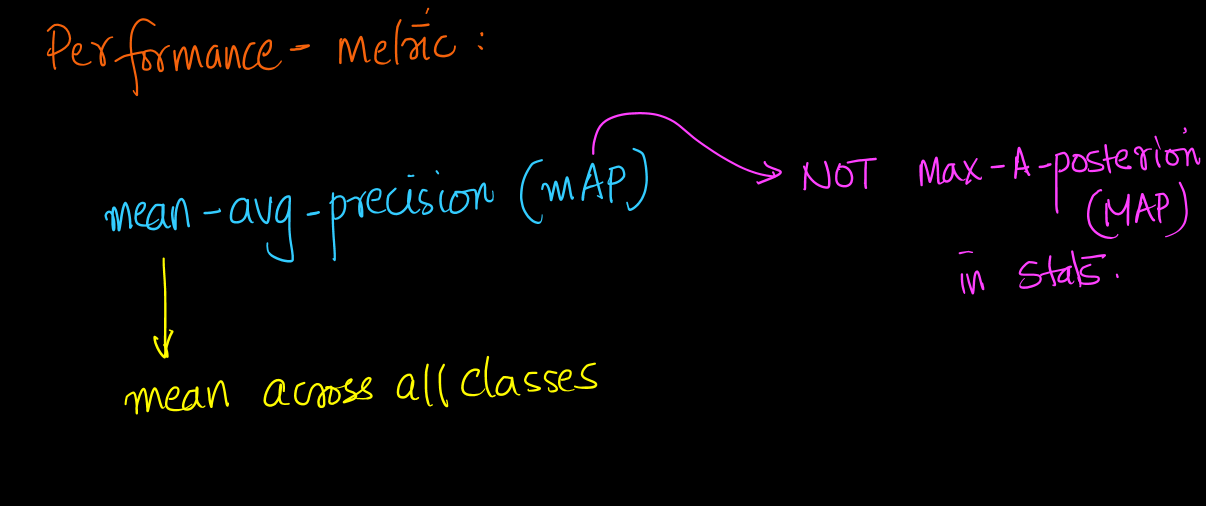

In [24]:
Image("C:\\Users\\aniru\\Desktop\\pm.png",height=300,width=500)

AP (Average precision) is a popular metric in measuring the accuracy of object detectors like Faster R-CNN, SSD, etc. Average precision computes the average precision value for recall value over 0 to 1. It sounds complicated but actually pretty simple as we illustrate it with an example. But before that, we will do a quick recap on precision, recall, and IoU first.
Precision & recall
Precision measures how accurate is your predictions. i.e. the percentage of your predictions are correct.
Recall measures how good you find all the positives. For example, we can find 80% of the possible positive cases in our top K predictions.

In [15]:
from scipy.special import expit

In [16]:
def _sigmoid(x):
    return expit(x)

In [17]:
def _softmax(x, axis=-1):
    x = x - np.amax(x, axis, keepdims=True)
    e_x = np.exp(x)
    
    return e_x / e_x.sum(axis, keepdims=True)

<h3>Yolo Correct Boxes </h3>

In [18]:
def correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w):
    if (float(net_w)/image_w) < (float(net_h)/image_h):
        new_w = net_w
        new_h = (image_h*net_w)/image_w
    else:
        new_h = net_w
        new_w = (image_w*net_h)/image_h
        
    for i in range(len(boxes)):
        x_offset, x_scale = (net_w - new_w)/2./net_w, float(new_w)/net_w
        y_offset, y_scale = (net_h - new_h)/2./net_h, float(new_h)/net_h
        
        boxes[i].xmin = int((boxes[i].xmin - x_offset) / x_scale * image_w)
        boxes[i].xmax = int((boxes[i].xmax - x_offset) / x_scale * image_w)
        boxes[i].ymin = int((boxes[i].ymin - y_offset) / y_scale * image_h)
        boxes[i].ymax = int((boxes[i].ymax - y_offset) / y_scale * image_h)

<h3> Non-max Suppression </h3>

NMS is used to make sure that in object detection, a particular object is identified only once. Consider a 100X100 image with a 9X9 grid and there is a car that we want to detect. If this car lies in multiple cells of grid, NMS ensures we identify the optimal cell among all candidates where this car belongs.

The way NMS works is :
→ It first discards all those cells where probability of object being present (calculated in final softmax layer) is <= 0.6
→ Then it takes the cell with largest probability among candidates for object as a prediction
→ Finally we discard any remaining cell with Intersection over union value >= 0.5 with the prediction cell.

In [19]:
def do_nms(boxes, nms_thresh):
    if len(boxes) > 0:
        nb_class = len(boxes[0].classes)
    else:
        return
        
    for c in range(nb_class):
        sorted_indices = np.argsort([-box.classes[c] for box in boxes])

        for i in range(len(sorted_indices)):
            index_i = sorted_indices[i]

            if boxes[index_i].classes[c] == 0: continue

            for j in range(i+1, len(sorted_indices)):
                index_j = sorted_indices[j]

                if bbox_iou(boxes[index_i], boxes[index_j]) >= nms_thresh:
                    boxes[index_j].classes[c] = 0

<h3>Decode Output </h3> 

### Rescale the network output
Remind you that <code>y_pred</code> takes any real values. 
Therefore

In [20]:
def decode_netout(netout, anchors, obj_thresh, net_h, net_w):
    grid_h, grid_w = netout.shape[:2]
    nb_box = 3
    netout = netout.reshape((grid_h, grid_w, nb_box, -1))
    nb_class = netout.shape[-1] - 5

    boxes = []

    netout[..., :2]  = _sigmoid(netout[..., :2])
    netout[..., 4]   = _sigmoid(netout[..., 4])
    netout[..., 5:]  = netout[..., 4][..., np.newaxis] * _softmax(netout[..., 5:])
    netout[..., 5:] *= netout[..., 5:] > obj_thresh

    for i in range(grid_h*grid_w):
        row = i // grid_w
        col = i % grid_w
        
        for b in range(nb_box):
            # 4th element is objectness score
            objectness = netout[row, col, b, 4]
            
            if(objectness <= obj_thresh): continue
            
            # first 4 elements are x, y, w, and h
            x, y, w, h = netout[row,col,b,:4]

            x = (col + x) / grid_w # center position, unit: image width
            y = (row + y) / grid_h # center position, unit: image height
            w = anchors[2 * b + 0] * np.exp(w) / net_w # unit: image width
            h = anchors[2 * b + 1] * np.exp(h) / net_h # unit: image height  
            
            # last elements are class probabilities
            classes = netout[row,col,b,5:]
            
            box = BoundBox(x-w/2, y-h/2, x+w/2, y+h/2, objectness, classes)

            boxes.append(box)

    return boxes

<h3> Pre-Process Image Input </h3>

In [21]:
'''
Resize the given image to the required size the yolo model can take as an input

'''
def preprocess_input(image, net_h, net_w):
    new_h, new_w, _ = image.shape

    # determine the new size of the image
    if (float(net_w)/new_w) < (float(net_h)/new_h):
        new_h = (new_h * net_w)//new_w
        new_w = net_w
    else:
        new_w = (new_w * net_h)//new_h
        new_h = net_h

    # resize the image to the new size
    resized = cv2.resize(image[:,:,::-1]/255., (new_w, new_h))

    # embed the image into the standard letter box
    new_image = np.ones((net_h, net_w, 3)) * 0.5
    new_image[(net_h-new_h)//2:(net_h+new_h)//2, (net_w-new_w)//2:(net_w+new_w)//2, :] = resized
    new_image = np.expand_dims(new_image, 0)
    
    return new_image


In [23]:
def get_yolo_boxes(model, images, net_h, net_w, anchors, obj_thresh, nms_thresh):
    image_h, image_w, _ = images[0].shape
    nb_images           = len(images)
    batch_input         = np.zeros((nb_images, net_h, net_w, 3))

    # preprocess the input
    for i in range(nb_images):
        batch_input[i] = preprocess_input(images[i], net_h, net_w)        

    # run the prediction
    batch_output = model.predict_on_batch(batch_input)
    batch_boxes  = [None]*nb_images

    for i in range(nb_images):
        yolos = [batch_output[0][i], batch_output[1][i], batch_output[2][i]]
        boxes = []

        # decode the output of the network
        for j in range(len(yolos)):
            yolo_anchors = anchors[(2-j)*6:(3-j)*6] # config['model']['anchors']
            boxes += decode_netout(yolos[j], yolo_anchors, obj_thresh, net_h, net_w)

        # correct the sizes of the bounding boxes
        correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w)

        # suppress non-maximal boxes
        do_nms(boxes, nms_thresh)        
           
        batch_boxes[i] = boxes

    return batch_boxes        

In [24]:
#https://github.com/experiencor/keras-yolo3
def compute_overlap(a, b):
    """
    Code originally from https://github.com/rbgirshick/py-faster-rcnn.
    Parameters
    ----------
    a: (N, 4) ndarray of float
    b: (K, 4) ndarray of float
    Returns
    -------
    overlaps: (N, K) ndarray of overlap between boxes and query_boxes
    """
    area = (b[:, 2] - b[:, 0]) * (b[:, 3] - b[:, 1])

    iw = np.minimum(np.expand_dims(a[:, 2], axis=1), b[:, 2]) - np.maximum(np.expand_dims(a[:, 0], 1), b[:, 0])
    ih = np.minimum(np.expand_dims(a[:, 3], axis=1), b[:, 3]) - np.maximum(np.expand_dims(a[:, 1], 1), b[:, 1])

    iw = np.maximum(iw, 0)
    ih = np.maximum(ih, 0)

    ua = np.expand_dims((a[:, 2] - a[:, 0]) * (a[:, 3] - a[:, 1]), axis=1) + area - iw * ih

    ua = np.maximum(ua, np.finfo(float).eps)

    intersection = iw * ih

    return intersection / ua  

In [25]:
#https://github.com/experiencor/keras-yolo3
def compute_ap(recall, precision):
    """ Compute the average precision, given the recall and precision curves.
    Code originally from https://github.com/rbgirshick/py-faster-rcnn.
    # Arguments
        recall:    The recall curve (list).
        precision: The precision curve (list).
    # Returns
        The average precision as computed in py-faster-rcnn.
    """
    # correct AP calculation
    # first append sentinel values at the end
    mrec = np.concatenate(([0.], recall, [1.]))
    mpre = np.concatenate(([0.], precision, [0.]))

    # compute the precision envelope
    for i in range(mpre.size - 1, 0, -1):
        mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

    # to calculate area under PR curve, look for points
    # where X axis (recall) changes value
    i = np.where(mrec[1:] != mrec[:-1])[0]

    # and sum (\Delta recall) * prec
    ap = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])
    return ap     

In [14]:
def evaluate(model, 
             generator, 
             iou_threshold=0.5,
             obj_thresh=0.5,
             nms_thresh=0.45,
             net_h=416,
             net_w=416,
             save_path=None):
    """ Evaluate a given dataset using a given model.
    code originally from https://github.com/fizyr/keras-retinanet
    # Arguments
        model           : The model to evaluate.
        generator       : The generator that represents the dataset to evaluate.
        iou_threshold   : The threshold used to consider when a detection is positive or negative.
        obj_thresh      : The threshold used to distinguish between object and non-object
        nms_thresh      : The threshold used to determine whether two detections are duplicates
        net_h           : The height of the input image to the model, higher value results in better accuracy
        net_w           : The width of the input image to the model
        save_path       : The path to save images with visualized detections to.
    # Returns
        A dict mapping class names to mAP scores.
    """    
    # gather all detections and annotations
    all_detections     = [[None for i in range(generator.num_classes())] for j in range(generator.size())]
    all_annotations    = [[None for i in range(generator.num_classes())] for j in range(generator.size())]

    for i in range(generator.size()):
        raw_image = [generator.load_image(i)]

        # make the boxes and the labels
        pred_boxes = get_yolo_boxes(model, raw_image, net_h, net_w, generator.get_anchors(), obj_thresh, nms_thresh)[0]

        score = np.array([box.get_score() for box in pred_boxes])
        pred_labels = np.array([box.label for box in pred_boxes])        
        
        if len(pred_boxes) > 0:
            pred_boxes = np.array([[box.xmin, box.ymin, box.xmax, box.ymax, box.get_score()] for box in pred_boxes]) 
        else:
            pred_boxes = np.array([[]])  
        
        # sort the boxes and the labels according to scores
        score_sort = np.argsort(-score)
        pred_labels = pred_labels[score_sort]
        pred_boxes  = pred_boxes[score_sort]
        
        # copy detections to all_detections
        for label in range(generator.num_classes()):
            all_detections[i][label] = pred_boxes[pred_labels == label, :]

        annotations = generator.load_annotation(i)
        
        # copy detections to all_annotations
        for label in range(generator.num_classes()):
            all_annotations[i][label] = annotations[annotations[:, 4] == label, :4].copy()

    # compute mAP by comparing all detections and all annotations
    average_precisions = {}
    
    for label in range(generator.num_classes()):
        false_positives = np.zeros((0,))
        true_positives  = np.zeros((0,))
        scores          = np.zeros((0,))
        num_annotations = 0.0

        for i in range(generator.size()):
            detections           = all_detections[i][label]
            annotations          = all_annotations[i][label]
            num_annotations     += annotations.shape[0]
            detected_annotations = []

            for d in detections:
                scores = np.append(scores, d[4])

                if annotations.shape[0] == 0:
                    false_positives = np.append(false_positives, 1)
                    true_positives  = np.append(true_positives, 0)
                    continue

                overlaps            = compute_overlap(np.expand_dims(d, axis=0), annotations)
                assigned_annotation = np.argmax(overlaps, axis=1)
                max_overlap         = overlaps[0, assigned_annotation]

                if max_overlap >= iou_threshold and assigned_annotation not in detected_annotations:
                    false_positives = np.append(false_positives, 0)
                    true_positives  = np.append(true_positives, 1)
                    detected_annotations.append(assigned_annotation)
                else:
                    false_positives = np.append(false_positives, 1)
                    true_positives  = np.append(true_positives, 0)

        # no annotations -> AP for this class is 0 (is this correct?)
        if num_annotations == 0:
            average_precisions[label] = 0
            continue

        # sort by score
        indices         = np.argsort(-scores)
        false_positives = false_positives[indices]
        true_positives  = true_positives[indices]

        # compute false positives and true positives
        false_positives = np.cumsum(false_positives)
        true_positives  = np.cumsum(true_positives)

        # compute recall and precision
        recall    = true_positives / num_annotations
        precision = true_positives / np.maximum(true_positives + false_positives, np.finfo(np.float64).eps)

        # compute average precision
        average_precision  = compute_ap(recall, precision)  
        average_precisions[label] = average_precision

    return average_precisions    


In [27]:
#from tensorflow.keras.models import model
infer_model.load_weights("traffic_signs_yolov3.h5")

In [ ]:
###############################
#   Run the evaluation
###############################   
# compute mAP for all the classes
average_precisions = evaluate(infer_model, valid_generator)

# print the score
for label, average_precision in average_precisions.items():
    print(LABELS[label] + ': {:.4f}'.format(average_precision))
print('mAP: {:.4f}'.format(sum(average_precisions.values()) / len(average_precisions))) 

In [ ]:
img_path=[]
for i in range(0,298):
    image_path="E:/GTSDB/TestIJCNN2013/" + '{0:05d}'.format(i) + ".jpg"
    img_path.append(image_path)

output_path="E:/GTSDB/pred_folder/"

for path in img_path:

    image = cv2.imread(path)
    print(path)

            # predict the bounding boxes
    boxes = get_yolo_boxes(infer_model, [image], net_h, net_w,ANCHORS, obj_thresh, nms_thresh)[0]

            # draw bounding boxes on the image using labels
    draw_boxes(image, boxes, LABELS, obj_thresh) 
     
            # write the image with bounding boxes to file
    cv2.imwrite(output_path + '{0:05d}'.format(img_path.index(path)) + ".jpg", np.uint8(image))         

E:/GTSDB/TestIJCNN2013/00000.jpg
E:/GTSDB/TestIJCNN2013/00001.jpg
E:/GTSDB/TestIJCNN2013/00002.jpg
E:/GTSDB/TestIJCNN2013/00003.jpg
E:/GTSDB/TestIJCNN2013/00004.jpg
E:/GTSDB/TestIJCNN2013/00005.jpg
E:/GTSDB/TestIJCNN2013/00006.jpg
E:/GTSDB/TestIJCNN2013/00007.jpg
E:/GTSDB/TestIJCNN2013/00008.jpg
E:/GTSDB/TestIJCNN2013/00009.jpg
E:/GTSDB/TestIJCNN2013/00010.jpg
E:/GTSDB/TestIJCNN2013/00011.jpg
E:/GTSDB/TestIJCNN2013/00012.jpg
E:/GTSDB/TestIJCNN2013/00013.jpg
E:/GTSDB/TestIJCNN2013/00014.jpg
E:/GTSDB/TestIJCNN2013/00015.jpg
E:/GTSDB/TestIJCNN2013/00016.jpg
E:/GTSDB/TestIJCNN2013/00017.jpg
E:/GTSDB/TestIJCNN2013/00018.jpg
E:/GTSDB/TestIJCNN2013/00019.jpg
E:/GTSDB/TestIJCNN2013/00020.jpg
E:/GTSDB/TestIJCNN2013/00021.jpg
E:/GTSDB/TestIJCNN2013/00022.jpg
E:/GTSDB/TestIJCNN2013/00023.jpg
E:/GTSDB/TestIJCNN2013/00024.jpg
E:/GTSDB/TestIJCNN2013/00025.jpg
E:/GTSDB/TestIJCNN2013/00026.jpg
E:/GTSDB/TestIJCNN2013/00027.jpg
E:/GTSDB/TestIJCNN2013/00028.jpg
E:/GTSDB/TestIJCNN2013/00029.jpg
E:/GTSDB/T

<h2>Final Predicitions</h2>


In [28]:
def create_path(num):
    pred_path="E:/GTSDB/pred_folder/"
    st='{0:05d}'.format(num)
    final_path=pred_path + st + ".jpg"
    return final_path

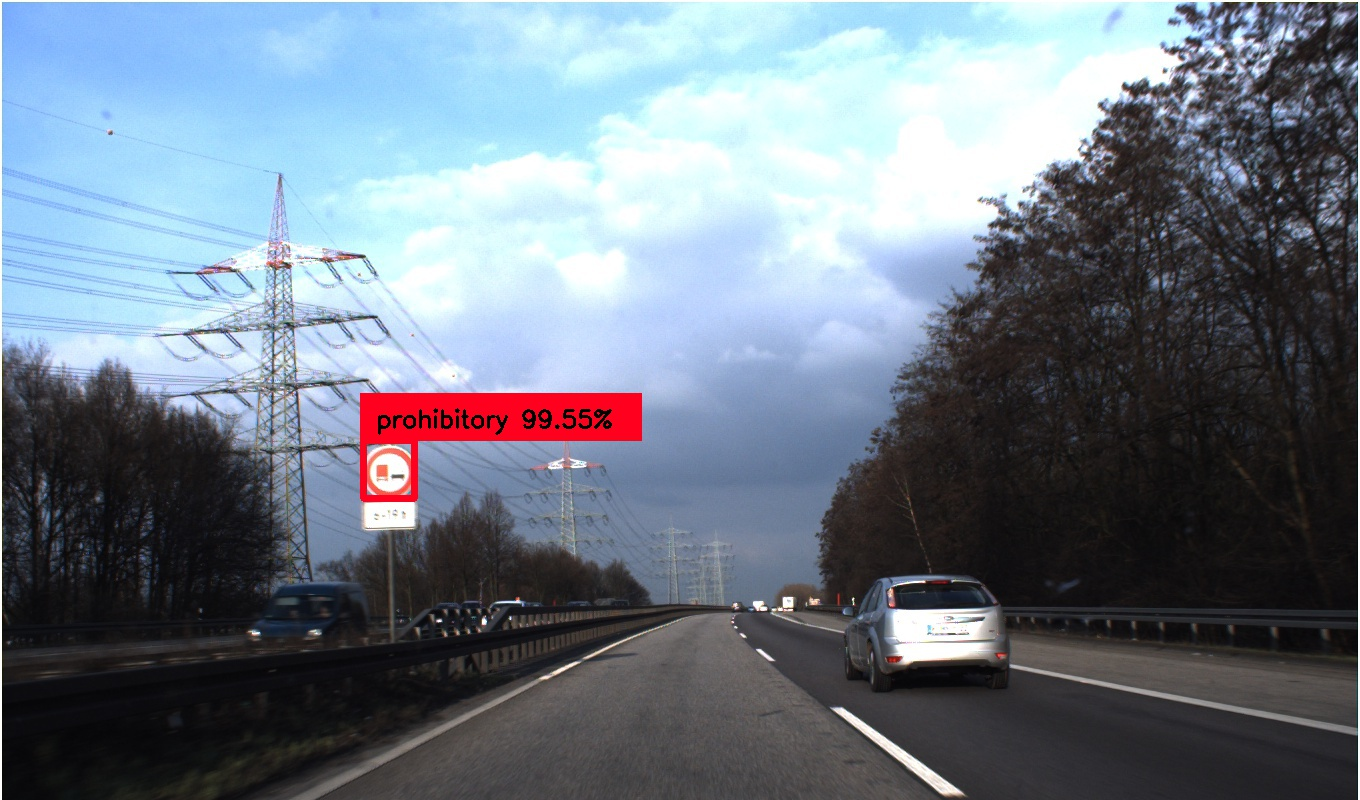

In [33]:
from IPython.display import Image
path=create_path(3)
Image(path,height=300,width=600)

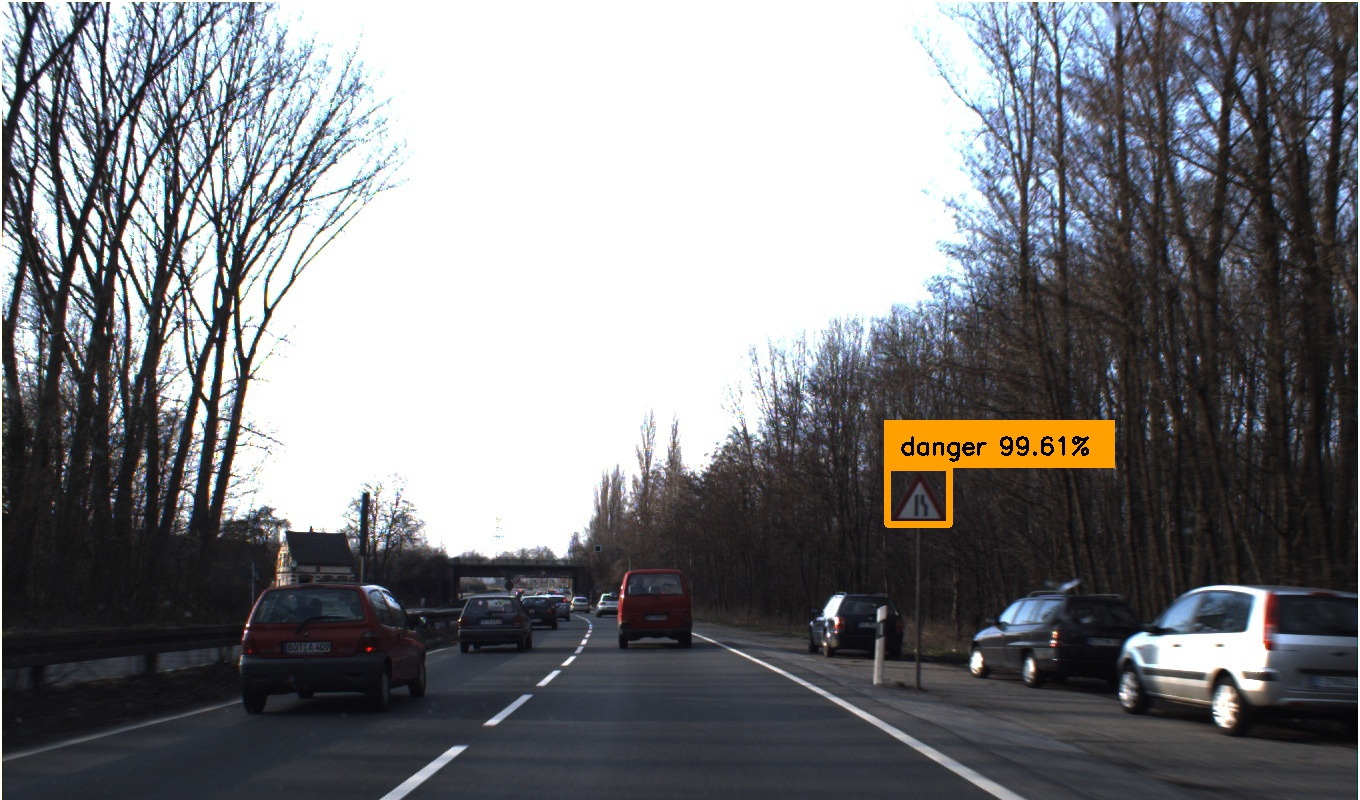

In [34]:
path=create_path(7)
Image(path,width=600,height=300)

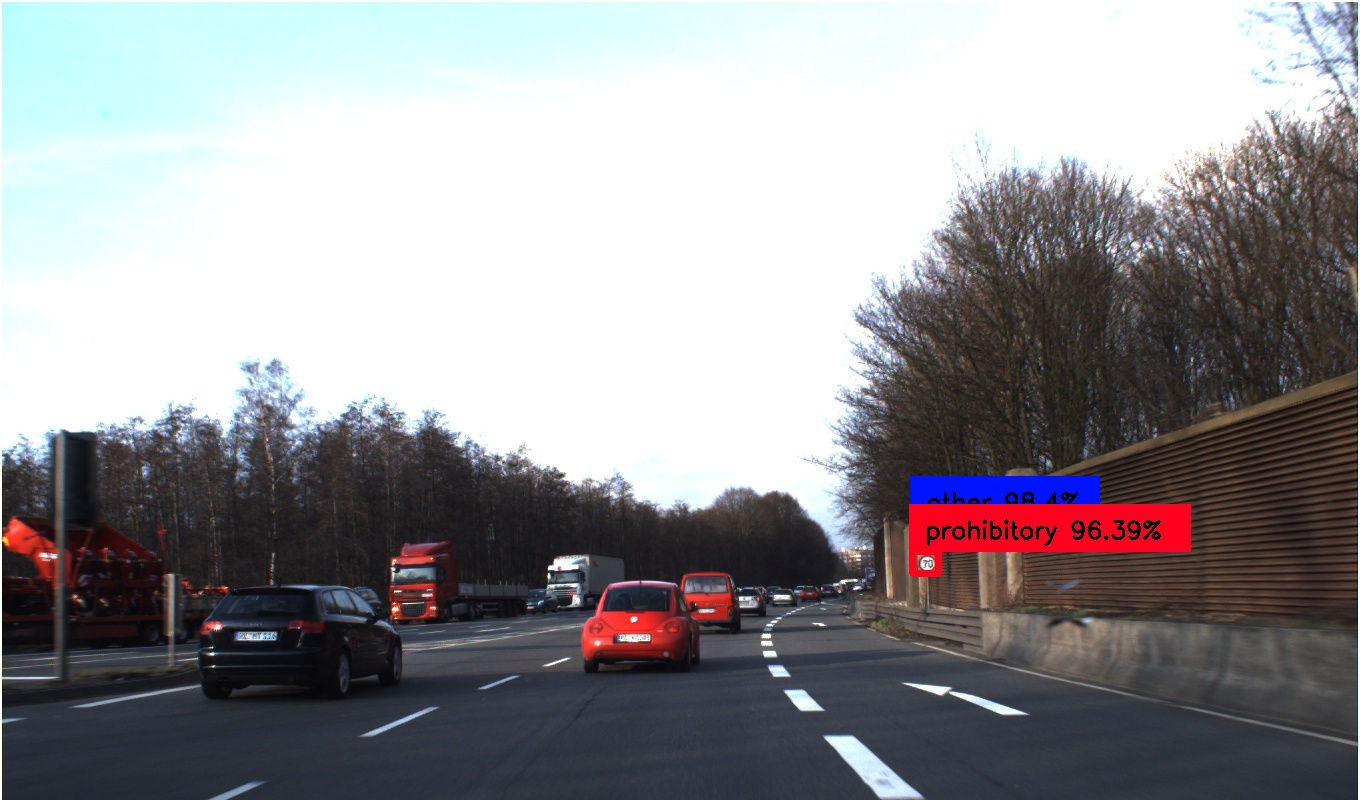

In [35]:
path=create_path(10)
Image(path,width=600,height=300)

<h2>References</h2>

- https://towardsdatascience.com/yolo-v3-object-detection-53fb7d3bfe6b
- https://pylessons.com/YOLOv3-TF2-custrom-images/
- https://www.youtube.com/watch?v=gKreZOUi-O0&t=0s&index=7&list=PL_IHmaMAvkVxdDOBRg2CbcJBq9SY7ZUvs
- https://machinelearningmastery.com/how-to-perform-object-detection-with-yolov3-in-keras/
- https://mlblr.com/includes/mlai/index.html#yolov2
- https://medium.com/@jonathan_hui/map-mean-average-precision-for-object-detection-45c121a31173
- https://github.com/experiencor/keras-yolo3